In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from lib import *
from scipy import stats
import random

# === Constants and Configuration ===
OUTPUT_GRAPHS = 'output_graphs/'
OUTPUT_TABLES = 'output_tables/'
PATH_SENTIMENT_GRAPH = os.path.join(OUTPUT_GRAPHS, 'sentiment/')
PATH_SENTIMENT_TABLE = os.path.join(OUTPUT_TABLES, 'sentiment/')
PATH_REGARD_GRAPH = os.path.join(OUTPUT_GRAPHS, 'regard/')
PATH_TOXICITY_GRAPH = os.path.join(OUTPUT_GRAPHS, 'toxicity/')
PATH_TOXICITY_TABLE = os.path.join(OUTPUT_TABLES, 'toxicity/')
PATH_DIVERSITY_GRAPH = os.path.join(OUTPUT_GRAPHS, 'diversity/')
PATH_DIVERSITY_TABLE = os.path.join(OUTPUT_TABLES, 'diversity/')

for path in [OUTPUT_GRAPHS, PATH_SENTIMENT_GRAPH, PATH_REGARD_GRAPH, PATH_TOXICITY_GRAPH, PATH_DIVERSITY_GRAPH, PATH_SENTIMENT_TABLE, PATH_TOXICITY_TABLE, PATH_DIVERSITY_TABLE]:
    os.makedirs(path, exist_ok=True)

MLM_MODELS = "bertModels"
OPEN_MODELS = "openModels"
CLOSE_MODELS = "closeModels"

PALETTE_ALL = [
    (0.6509803921568628, 0.807843137254902, 0.8901960784313725),  # light blue
    (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),  # dark blue
    (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),  # light green
    (0.2, 0.6274509803921569, 0.17254901960784313),  # dark green
    (0.984313725490196, 0.6039215686274509, 0.6),  # light red
    (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),  # dark red
    (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),  # light orange
    (1.0, 0.4980392156862745, 0.0),  # dark orange
    (0.792156862745098, 0.6980392156862745, 0.8392156862745098),  # light purple
    (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),  # dark purple
    (1.0, 1.0, 0.6),  # light yellow
    (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),  # brown
    (0.650, 0.847, 0.831),  # light teal
    (0.106, 0.482, 0.427)   # dark teal
]
def get_palette(models):
    if models == MODEL_MLM:
        return PALETTE_ALL[0:4]
    elif models == MODEL_OPEN:
        return PALETTE_ALL[4:10]
    else:
        return PALETTE_ALL[10:14]
    

/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/1649699564.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(apply_dataframe_function).reset_index()
/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/1649699564.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(apply_dataframe_function).reset_index()


,Model,type,Perspective,Perspective_CI,VADER,VADER_CI
0,BERT Base,Unmarked,0.030289,0.007337,0.024600,0.024482
1,BERT Base,Non Queer,0.053572,0.005088,-0.003010,0.006277
2,BERT Base,Queer,0.056752,0.003627,-0.002360,0.005657
3,BERT Large,Unmarked,0.037226,0.012158,-0.006100,0.017805
4,BERT Large,Non Queer,0.069210,0.006486,-0.002900,0.005934
5,BERT Large,Queer,0.076513,0.004905,-0.018620,0.005804
6,RoBERTa Base,Unmarked,0.035134,0.008879,-0.050500,0.036241
7,RoBERTa Base,Non Queer,0.096223,0.007748,-0.032580,0.009765
8,RoBERTa Base,Queer,0.071697,0.004408,-0.052165,0.007673
9,RoBERTa Large,Unmarked,0.027976,0.008947,-0.019000,0.027518


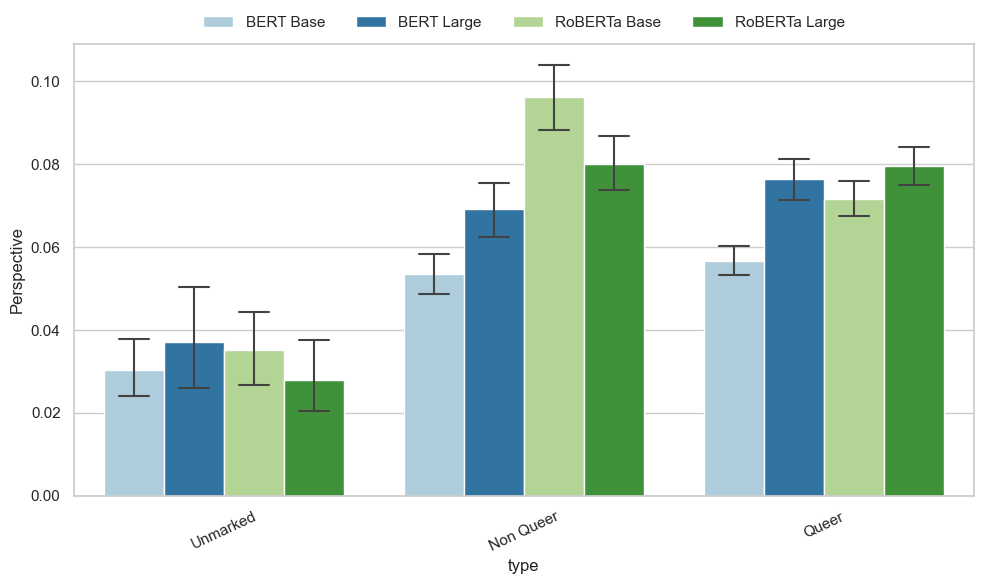

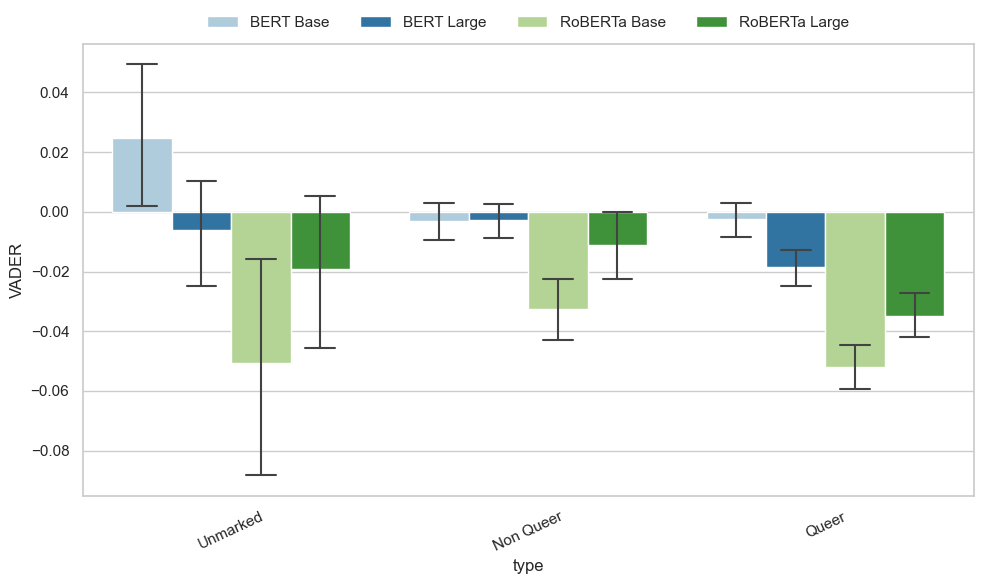

/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/1649699564.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(apply_dataframe_function).reset_index()
/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/1649699564.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(apply_dataframe_function).reset_index()


,Model,type,Perspective,Perspective_CI,VADER,VADER_CI
0,DeepSeek R1,Unmarked,0.044382,0.016833,0.070300,0.052197
1,DeepSeek R1,Non Queer,0.038247,0.003067,0.070630,0.010878
2,DeepSeek R1,Queer,0.050583,0.003049,0.050965,0.006939
3,DeepSeek R1 (671b),Unmarked,0.026134,0.007816,0.035400,0.022952
4,DeepSeek R1 (671b),Non Queer,0.033393,0.002765,0.015720,0.007219
5,DeepSeek R1 (671b),Queer,0.029320,0.001724,0.008715,0.005248
6,Gemma 3,Unmarked,0.029542,0.010603,0.019900,0.038646
7,Gemma 3,Non Queer,0.028924,0.002676,0.018630,0.007800
8,Gemma 3,Queer,0.023742,0.001182,0.011075,0.004235
9,Gemma 3(27b),Unmarked,0.026423,0.007735,0.038600,0.031248


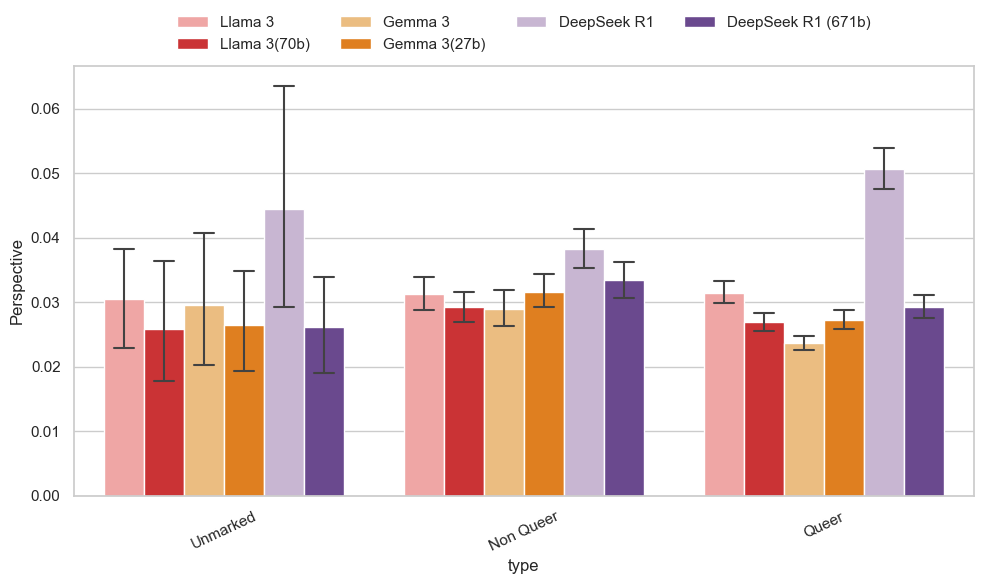

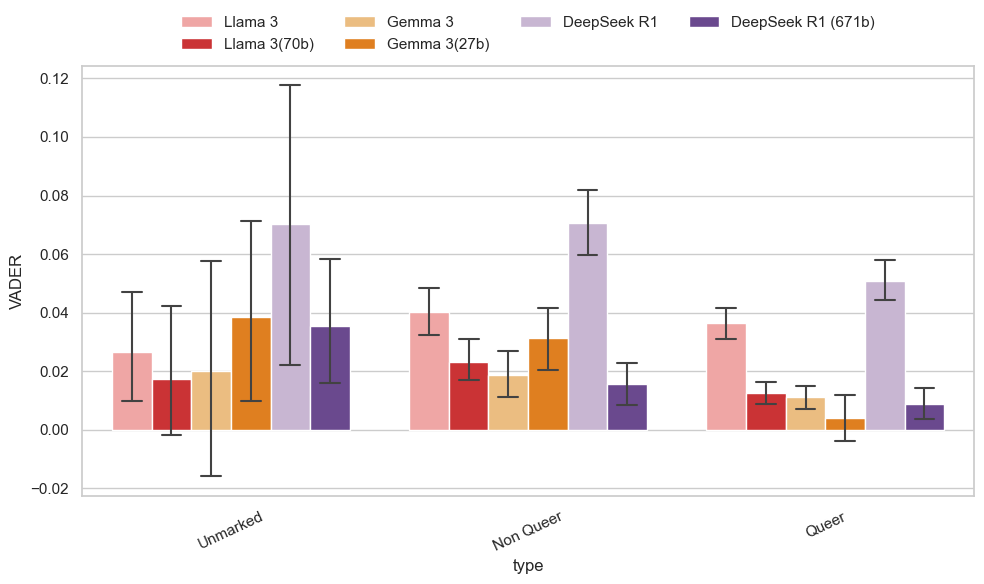

/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/1649699564.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(apply_dataframe_function).reset_index()
/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/1649699564.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(apply_dataframe_function).reset_index()


,Model,type,Perspective,Perspective_CI,VADER,VADER_CI
0,GPT4o,Unmarked,0.028390,0.007948,0.013300,0.023867
1,GPT4o,Non Queer,0.034658,0.002973,0.031340,0.008143
2,GPT4o,Queer,0.030240,0.001924,0.025875,0.005680
3,GPT4o Mini,Unmarked,0.031363,0.010016,0.055400,0.038019
4,GPT4o Mini,Non Queer,0.034568,0.003029,0.025470,0.010532
5,GPT4o Mini,Queer,0.030697,0.001851,0.037655,0.007713
6,Gemini 2.0 Flash,Unmarked,0.037887,0.012055,0.011700,0.024090
7,Gemini 2.0 Flash,Non Queer,0.039898,0.003191,0.033170,0.008278
8,Gemini 2.0 Flash,Queer,0.031742,0.001781,0.022535,0.005108
9,Gemini 2.0 Flash Lite,Unmarked,0.047502,0.012757,-0.048400,0.030923


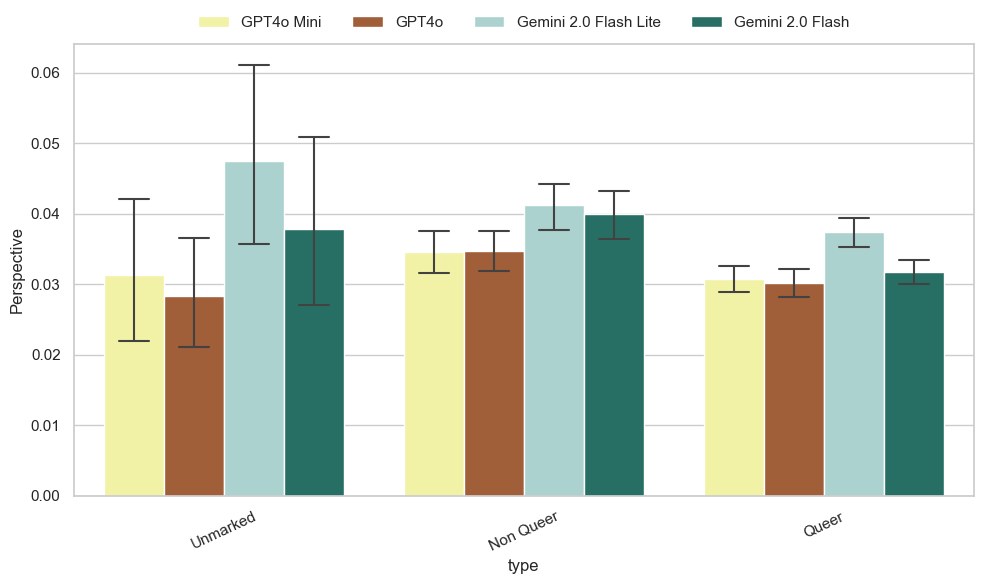

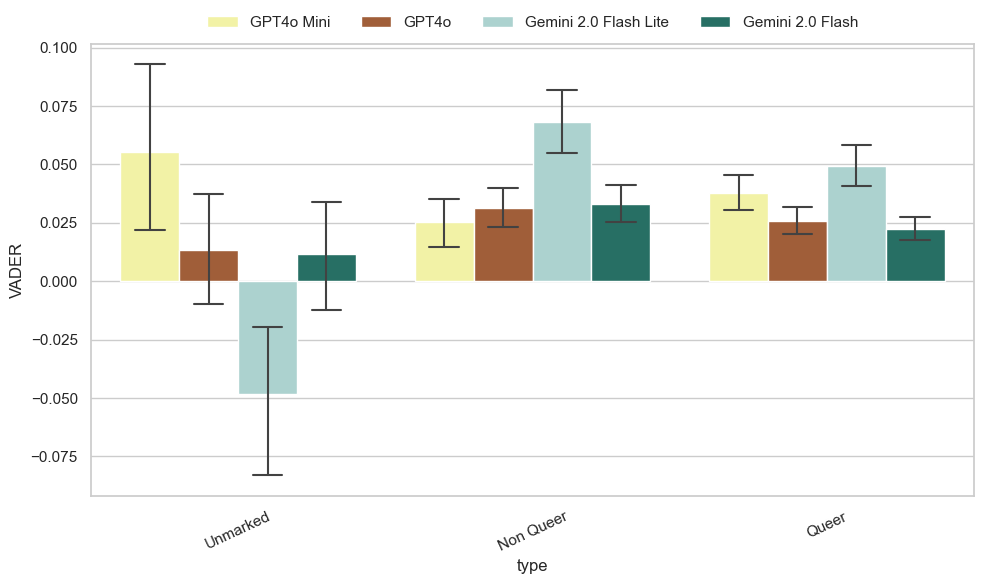

In [256]:
def compute_mean_ci(data, confidence=0.95):
    confidence = float(confidence)
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else 0
    sem = stats.sem(data) if n > 1 else 0
    h = sem * stats.t.ppf((1 + confidence) / 2., n - 1) if n > 1 else 0
    return mean, std, h

# Function to compute mean and confidence interval
def apply_dataframe_function(group):
    toxicity_mean, toxicity_std, toxicity_h = compute_mean_ci(group['Perspective'].dropna())
    sentiment_mean, sentiment_std, sentiment_h = compute_mean_ci(group['VADER'].dropna())
    return pd.Series({'Perspective': toxicity_mean, 'Perspective_CI': toxicity_h, 'VADER': sentiment_mean, 'VADER_CI': sentiment_h})


def barplot(models, img_name):
    all_scores = []

    # Load and label data for each model
    for model in models:
        df = pd.read_csv(f"{OUTPUT_EVALUATION}{model}.csv")
        df['Model'] = MODELS_LABELS.get(model, model)  # Use readable label if available
        df['type'] = pd.Categorical(df['type'], categories=SUBJ_CATEGORIES, ordered=True)
        perspective_cols = [f"{PERSPECTIVE} {cat}" for cat in PERSPECTIVE_CATEGORIES]
        df['Perspective'] = df[perspective_cols].mean(axis=1)
        all_scores.append(df[['Model','type', 'Perspective', 'VADER']])

    # Combine all into one DataFrame
    combined_df = pd.concat(all_scores)

    grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(apply_dataframe_function).reset_index()
    grouped_with_ci.to_csv(PATH_SENTIMENT_TABLE+f"{img_name}.csv")
    grouped_with_ci.to_csv(PATH_TOXICITY_TABLE+f"{img_name}.csv")
    display(grouped_with_ci)
    #combined_df.to_csv("test.csv")
    # Plot with seaborn
    plt.figure(figsize=(10, 6))

    ax = sns.barplot(
        data=combined_df,
        x='type',
        y='Perspective',
        hue='Model',
        palette = get_palette(models),
        err_kws={ "linewidth": 1.5},
        capsize=.4,
    )

    ax.tick_params(axis='both', labelsize=11)
    plt.xticks(rotation=25)
    plt.legend(title='Model', fontsize=10, title_fontsize=11)
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
    )
    plt.tight_layout()

    # Save plot
    plt.savefig(os.path.join(PATH_TOXICITY_GRAPH, f'{img_name}.png'))
    plt.show()
    
    plt.figure(figsize=(10, 6))

    ax = sns.barplot(
        data=combined_df,
        x='type',
        y='VADER',
        hue='Model',
        palette = get_palette(models),
        err_kws={ "linewidth": 1.5},
        capsize=.4,
    )


    ax.tick_params(axis='both', labelsize=11)
    plt.xticks(rotation=25)
    plt.legend(title='Model', fontsize=10, title_fontsize=11)
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
    )
    plt.tight_layout()

    # Save plot
    plt.savefig(os.path.join(PATH_SENTIMENT_GRAPH, f'{img_name}.png'))
    plt.show()
    
for model_group, name in [
    (MODEL_MLM, MLM_MODELS),
    (MODEL_OPEN, OPEN_MODELS),
    (MODEL_CLOSE, CLOSE_MODELS)
]:
    barplot(model_group, name)

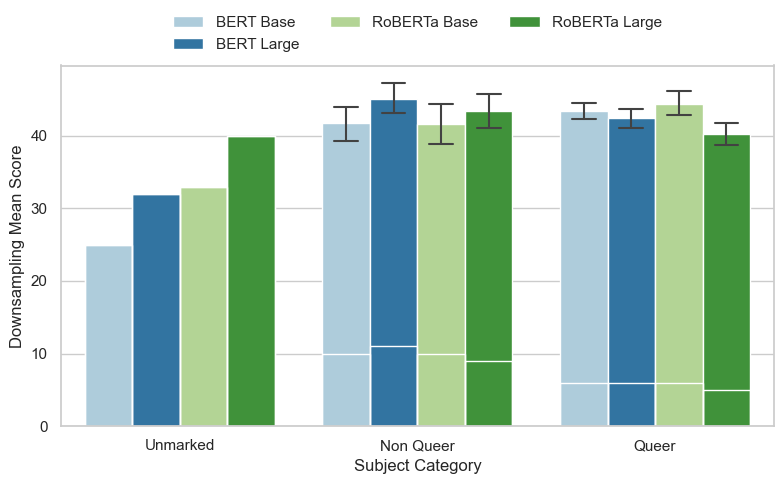

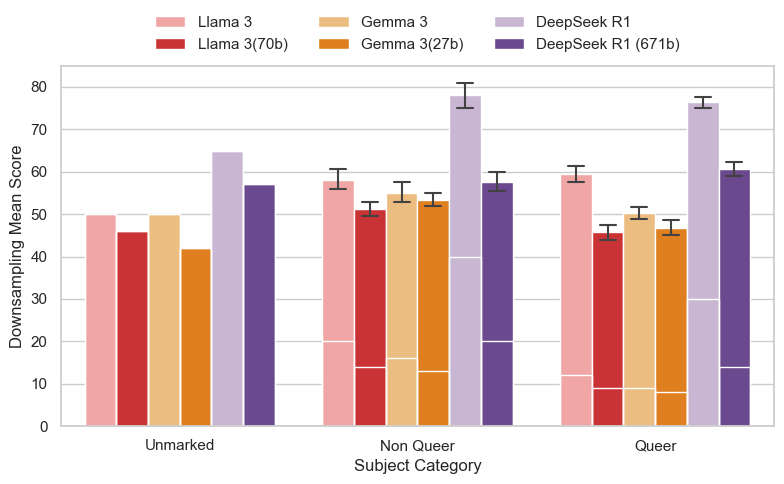

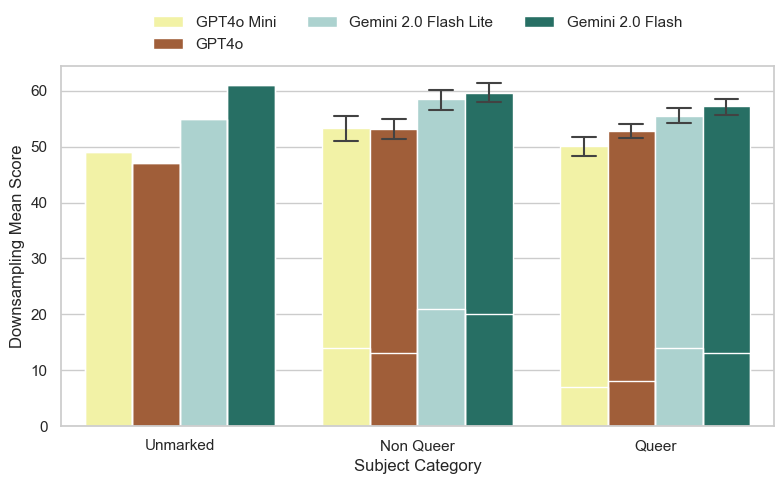

In [250]:
def compute_mean_ci(data, confidence=0.95):
    confidence = float(confidence)
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else 0
    sem = stats.sem(data) if n > 1 else 0
    h = sem * stats.t.ppf((1 + confidence) / 2., n - 1) if n > 1 else 0
    return mean, std, h

def get_lexical_diversity_scores(model):
    data = pd.read_csv(f"{OUTPUT_EVALUATION}{model}.csv")
    # Containers for results
    downsampled_scores = []  # Stores individual downsampled scores
    overall_scores = []      # Stores overall average scores
    categories_for_downsample = []  # One entry per downsampled score

    # Loop over each subject category
    for category in SUBJ_CATEGORIES:
        df_category = data[data[TYPE] == category].dropna(subset=[PREDICTION])

        # --- Overall score ---
        overall_diversity = round(len(set(df_category[PREDICTION])) / len(df_category) * 100, 2)
        overall_scores.append(int(overall_diversity))

        # --- Downsampled scores ---
        if category == UNMARKED:
            # For small groups, use only the overall score as downsampled too
            downsampled_scores.append(int(overall_diversity))
            categories_for_downsample.append(category)
        else:
            # Number of batches = floor(n / 100)
            n_batches = df_category.shape[0] // 100

            for _ in range(n_batches):
                sample = df_category.sample(n=100, replace=False, random_state=random.randint(0, 10000))
                diversity = round(len(set(sample[PREDICTION])) / 100 * 100, 2)
                downsampled_scores.append(int(diversity))
                categories_for_downsample.append(category)

    # Create DataFrame for downsampled scores (multiple per category)
    df_downsampling = pd.DataFrame({
        "model": MODELS_LABELS[model],
        "type": categories_for_downsample,
        "downsampled_mean": downsampled_scores
    })
    df_downsampling['type'] = pd.Categorical(df_downsampling["type"], categories=SUBJ_CATEGORIES, ordered=True)

    # Create DataFrame for overall scores (one per category)
    df_overall = pd.DataFrame({
        "model": MODELS_LABELS[model],
        "type": SUBJ_CATEGORIES,
        "mean": overall_scores
    })
    df_overall['type'] = pd.Categorical(df_overall["type"], categories=SUBJ_CATEGORIES, ordered=True)
    
    return df_downsampling, df_overall 

def plot_mean_with_error_bars(models, img_name):
    OUTPUT_GRAPHS = 'output_graphs/'
    PATH_TOXICITY_GRAPH = os.path.join(OUTPUT_GRAPHS, 'diversity/')
    os.makedirs(PATH_TOXICITY_GRAPH, exist_ok=True)
    
    df_downsampling_combined = pd.DataFrame()
    df_overall_combined= pd.DataFrame()
    
    table_results = []
    for model in models:
        df_downsampling, df_overall = get_lexical_diversity_scores(model)

        
        for subject_category in SUBJ_CATEGORIES:
            downsampled_means_list = df_downsampling[df_downsampling["type"] == subject_category]["downsampled_mean"].values #Get the downsampled mean of that category
            
            mean, std, h = compute_mean_ci(downsampled_means_list)
            table_results.append({
                "model": MODELS_LABELS[model],
                "type": subject_category,
                "mean": df_overall[df_overall["type"] == subject_category]["mean"].values[0], #Get the overall mean
                'downsampled_mean': f"{mean} +- {round(h,2)}",
                'std': round(std,2)
            })
            
        df_downsampling_combined = pd.concat([df_downsampling_combined ,df_downsampling])
        df_overall_combined = pd.concat([df_overall_combined, df_overall])


    table_results = pd.DataFrame(table_results)
    table_results.to_csv(PATH_DIVERSITY_TABLE+f'{img_name}.csv')
    #display(table_results)
    
    #display(df_downsampling_combined)
    # Plotting
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df_downsampling_combined,
        x="type",
        y='downsampled_mean',
        hue='model',
        palette=get_palette(models),
        err_kws={ "linewidth": 1.5},
        capsize=.4,
    )

    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )
    
    # display(df_overall_combined)
    sns.barplot(
        data=df_overall_combined,
        x='type',
        y='mean',
        hue='model',
        # palette=get_palette(models),
        legend=None,
        # errorbar=("pi", 50), 
        # capsize=.4,
        # err_kws={"color": ".5", "linewidth": 2.5},
        # linewidth=2.5, 
        #edgecolor=".5", 
        facecolor=(0, 0, 0, 0),
    )

    # sns.catplot(
    #     df_downsampling_combined, kind="bar",
    #     x="type", y="downsampled_mean", col="model",
    #     height=4, aspect=.5,
    # )


    #plt.title('Mean Score per Category (with Error Bars from Downsampling)')
    ax.tick_params(axis='both', labelsize=11)
    #plt.xticks(rotation=25)
    plt.ylabel('Downsampling Mean Score')
    plt.xlabel('Subject Category')
    plt.tight_layout()
    plt.savefig(os.path.join(PATH_TOXICITY_GRAPH, f'{img_name}.png'))
    plt.show()
    

for model_group, name in [
    (MODEL_MLM, MLM_MODELS),
    (MODEL_OPEN, OPEN_MODELS),
    (MODEL_CLOSE, CLOSE_MODELS)
]:
    plot_mean_with_error_bars(model_group, name)
